In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plotter(file_path,type):
    """
    Szép ábra lesz
    """
    plots = []
    with open(file_path, "r") as file:
        current_label = None
        current_data = []
        
        for line in file:
            line = line.strip()
            if not line:
                continue
            if line.startswith("# initial_x ="):
                if current_data:
                    plots.append((current_label, pd.DataFrame(current_data, columns=["x", "y"])))
                    current_data = []
                current_label = float(line.split("=")[1])
            elif line.startswith("x,y"):
                continue  
            else:
                x_str, y_str = line.split(",")
                current_data.append((float(x_str), float(y_str)))
        
        if current_data:
            plots.append((current_label, pd.DataFrame(current_data, columns=["x", "y"])))

    # Kirajzolás
    plt.figure(figsize=(10, 6))
    for label, df in plots:
        plt.plot(df["x"], df["y"], linewidth=0.7, label=f"x0={label:.2f}")

    plt.title(f"Duffing oszcillátor {type}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## A Cpu-val számolt plotok ##

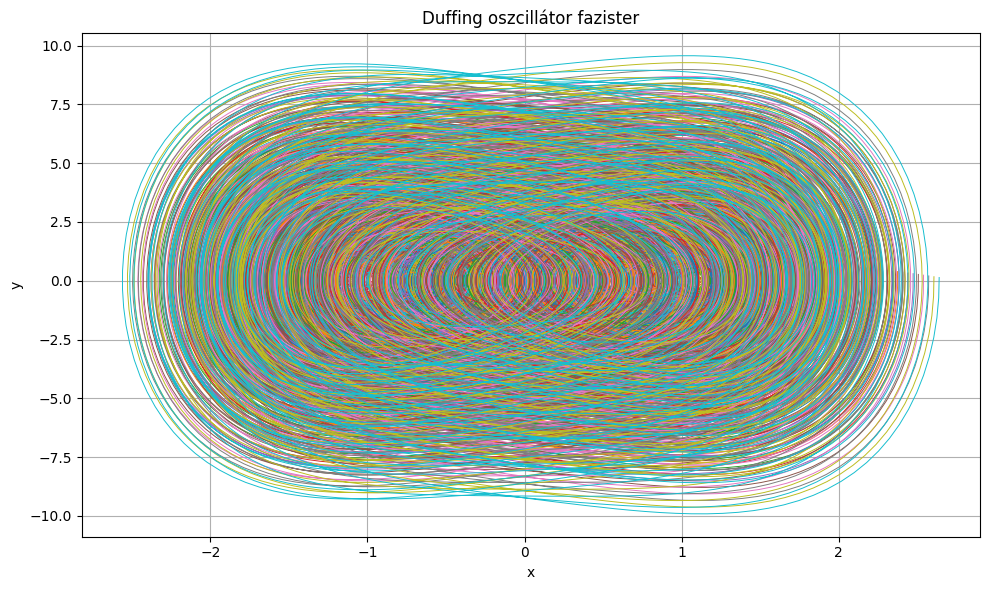

In [34]:
plotter("duffing_all_phase.csv","fazister")

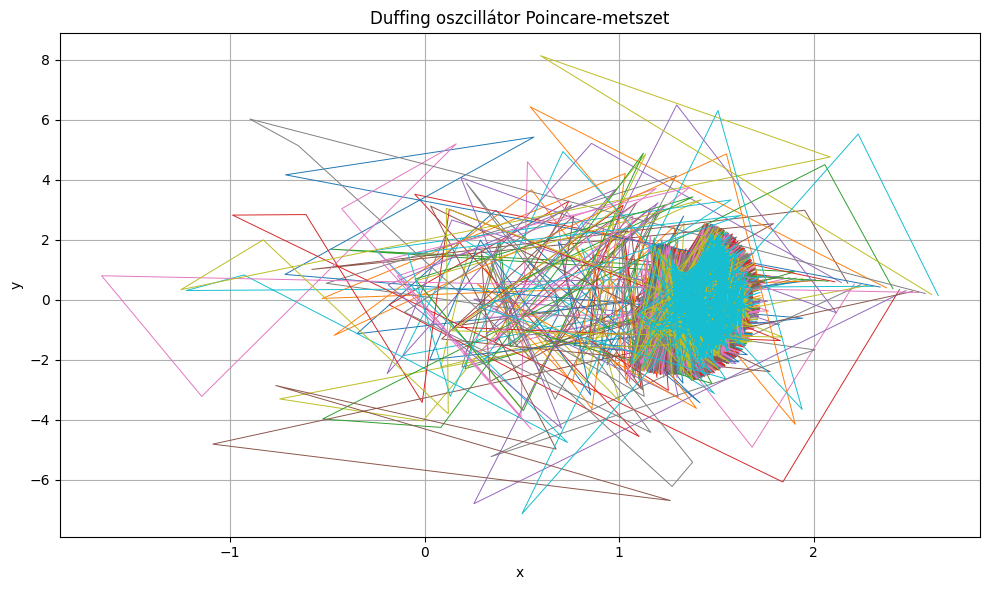

In [35]:
plotter("duffing_all_poincare.csv","Poincare-metszet")

## GPU-val számolt plotok ##

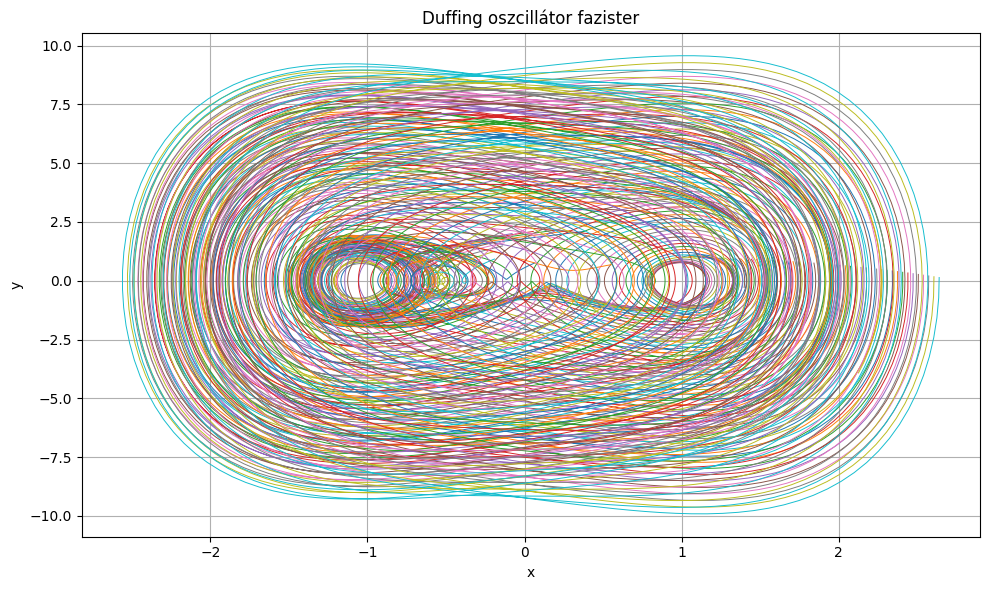

In [36]:
plotter("duffing_cuda_phase.csv","fazister")

## Kiértékelés ##

Eltérések forrásai:
- a floatok műveletinél különböző szabványok vannak hardver függvényében, a pontosság rovására a GPU gyorsaságra optimalizál és eből lehetnek numerikus eltérések
- általánosságban lehet hiba abból, hogy más sorrendben végzik el a műveleteket, de nálam minden szám adott, és a műveletek felcserélhetőek szóval itt ebből nem lesz hiba
